In [22]:
import pandas as pd 
#for the importing dataset
import numpy as np
%matplotlib inline 
#to plot the whatever graphic
import matplotlib.pyplot as plt #plot data
#import common libaries
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

0        3861.9
1        3994.2
2        4060.3
3        4020.6
4        3928.1
         ...   
1807    14350.0
1808    15300.0
1809    16350.0
1810    17400.0
1811    18400.0
Name: price, Length: 1812, dtype: float64

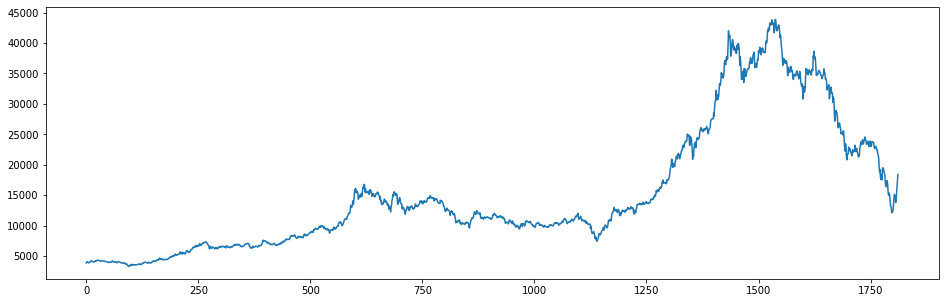

In [43]:
#import the dataset 
HPG=pd.read_csv(r"/content/HoaPhatdataset (3).csv")
# HPG.index = HPG['date']
# Convert the 'date' column to a datetime data type
HPG['date']=pd.to_datetime(HPG.date,format='%m/%d/%Y')
#set the date as the index
# HPG=HPG.set_index(pd.DatetimeIndex(HPG['date'].values))
HPG['Time'] = np.arange(len(HPG.index))
HPG['price'].plot(figsize=(16,5))
HPG['price']

,price,Open,High,Low,Time
count,1812.00000,1812.000000,1812.000000,1812.000000,1812.000000
mean,15288.53819,15294.660375,15508.131623,15089.505408,905.500000
std,10456.63874,10482.328760,10623.617303,10328.726382,523.223662
min,3280.00000,3187.400000,3293.200000,3161.000000,0.000000
25%,7739.47500,7728.450000,7808.575000,7660.925000,452.750000
50%,11578.70000,11605.100000,11727.400000,11435.350000,905.500000
75%,20906.90000,20704.500000,21422.550000,20470.600000,1358.250000
max,43895.80000,43895.800000,44198.500000,43517.400000,1811.000000


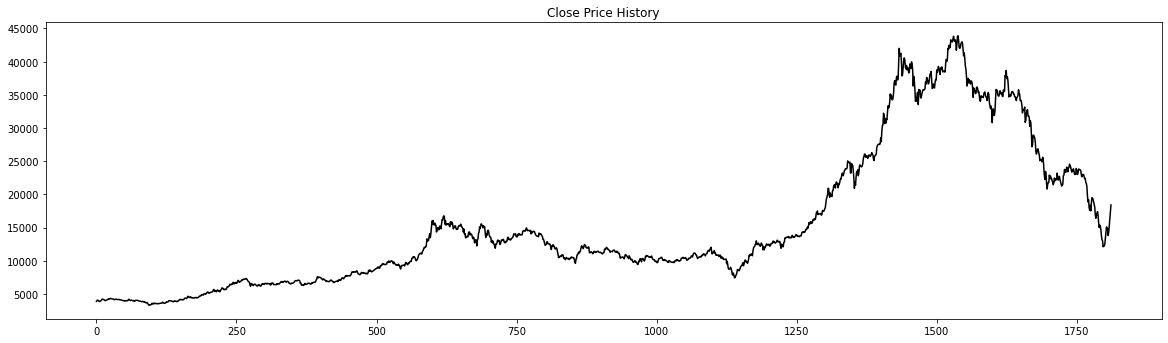

In [44]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('Close Price History')
#the figure has 2 row, 1 columns, and this plot is the first plot. 
HPG['price'].plot(style="k")
# plt.subplot(2, 1, 2)
# #the figure has 2 row, 1 columns, and this plot is the second plot. 
# POW['Vol'].plot(style="k")
# plt.title('Volume History')
HPG.describe()

Kiem dinh ADF coi thu chuoi co nghiem don vi hay khong va tinh dung





In [45]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(HPG['price'].dropna() )
print('ADF Statistic: {} '.format(result[0]))
print('p-value: {} '.format(result[1]))
print('Critical value : {} ')
for key,value in result[4].items():
            print('\t{}: {}'.format(key, value))
if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

ADF Statistic: -1.4419547989839905 
p-value: 0.5620055177138557 
Critical value : {} 
	1%: -3.43401669852096
	5%: -2.863159643456451
	10%: -2.5676322468019896
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


The output above shows that the p-value is greater than the significance level of 0.05, so we fail to reject the null hypothesis. The series is not stationary and requires differencing.

In [46]:
from statsmodels.tsa.statespace.tools import diff
result = adfuller(HPG['price'].diff().dropna() )
print('ADF Statistic: {} '.format(result[0]))
print('p-value: {} '.format(result[1]))
print('Critical value : {} ')
for key,value in result[4].items():
            print('\t{}: {}'.format(key, value))
if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

ADF Statistic: -6.387571006905839 
p-value: 2.145321497295357e-08 
Critical value : {} 
	1%: -3.43401669852096
	5%: -2.863159643456451
	10%: -2.5676322468019896
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [47]:
! pip install pmdarima
import warnings 
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
import pmdarima as pm

In [49]:
model  = pm.auto_arima(HPG['price'],
                      test='adf',       # use adftest to find optimal 'd' # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)     # set to stepwise
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26962.426, Time=2.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26970.815, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26967.001, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26966.295, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26969.496, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26965.182, Time=0.67 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26964.639, Time=0.74 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=26956.610, Time=7.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=26966.021, Time=2.19 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=26956.315, Time=11.21 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=26967.147, Time=3.28 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=26951.608, Time=13.30 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=26960.740, Time=4.38 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=7.36 sec
 ARIMA(4,1,3)(0,0,0)[0]

In the above output, the lowest AIC value of Best model:  ARIMA(4,1,0), and that is used as the final estimator.

> Indented block





In [52]:
# Split the 'df1' DataFrame into train and test datasets
# Convert the 'df1' DataFrame to a NumPy array
data = HPG.values
# Calculate the number of rows to use for the train dataset
# Set 30% for testing
t = .8
t = int(t * len(HPG))

# Set 20% for testing
train = HPG[:t]
test = HPG[t:]

In [53]:
result = adfuller(train['price'].diff().dropna())
print('ADF Statistic: {} '.format(result[0]))
print('p-value: {} '.format(result[1]))
print('Critical value : {} ')
for key,value in result[4].items():
            print('\t{}: {}'.format(key, value))
if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

ADF Statistic: -5.7849989934729855 
p-value: 5.023337995596247e-07 
Critical value : {} 
	1%: -3.434953749425684
	5%: -2.8635732362456845
	10%: -2.567852483484606
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [54]:
#ignore the harmless Warning
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


In [55]:
model_2 = sm.tsa.arima.ARIMA(train['price'],order=(5,1,2))
# results = model.fit(disp=-1)
# results.summary()
results_2 = model_2.fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                 1449
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -10300.063
Date:                Tue, 03 Jan 2023   AIC                          20616.126
Time:                        07:47:25   BIC                          20658.349
Sample:                             0   HQIC                         20631.883
                               - 1449                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7763      0.050     15.651      0.000       0.679       0.873
ar.L2         -0.8798      0.053    -16.546      0.000      -0.984      -0.776
ar.L3          0.0262      0.024      1.110      0.267      -0.020       0.072
ar.L4         -0.0041      0.018     -0.222      0.824      -0.040       0.032
ar.L5         -0.0877      0.014     -6.283      0.000      -0.115      -0.060
ma.L1         -0.7293      0.047    -15.577      0.000      -0.821      -0.638
ma.L2          0.8208      0.048     17.151      0.000       0.727       0.915
sigma2      8.961e+04   1563.222     57.321      0.000    8.65e+04    9.27e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              6239.06
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):              18.90   Skew:                             0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
#Here’s how to predict the values using the ARIMA model:
predictions = results_2.predict()
print(predictions)

0           0.000000
1        3878.960635
2        3991.065453
3        4047.823647
4        4008.388434
            ...     
1444    40140.922414
1445    38996.221259
1446    38789.076945
1447    39502.181443
1448    38853.030263
Name: predicted_mean, Length: 1449, dtype: float64


In [57]:
# Obtain predicted values
start=len(train)
end=len(train) + len(test) - 1
predictions_2 = results_2.predict(start= len(train), end = ( len(HPG) - 1 ), dynamic=True, typ='levels').rename('ARIMA(4,1,0) Predictions TRAIN')
predictions_2
df = pd.DataFrame(predictions_2)
df

,"ARIMA(4,1,0) Predictions TRAIN"
1449,39310.602352
1450,39351.665190
1451,39188.925967
1452,39089.477700
1453,39122.590411
...,...
1807,39190.405671
1808,39190.405671
1809,39190.405671
1810,39190.405671


In [59]:
# #Thay the cot Price bằng cột dữ liệu Predictions

pred_2 = test.copy()
pred_2['price'] = df
pred_2

,date,price,Open,High,Low,Vol.,Change %,Time
1449,2021-06-23,39310.602352,39052.1,39279.2,38673.7,24.13M,-0.58%,1449
1450,2021-06-24,39351.665190,38900.8,39127.8,38219.6,25.98M,-1.56%,1450
1451,2021-06-25,39188.925967,38371.0,38749.4,37689.8,34.05M,0.20%,1451
1452,2021-06-28,39089.477700,38825.1,39733.3,38446.7,50.91M,3.35%,1452
1453,2021-06-29,39122.590411,39733.3,39808.9,39127.8,25.78M,-1.15%,1453
...,...,...,...,...,...,...,...,...
1807,2022-11-24,39190.405671,13700.0,14400.0,13600.0,31.12M,3.99%,1807
1808,2022-11-25,39190.405671,14600.0,15300.0,14350.0,26.53M,6.62%,1808
1809,2022-11-28,39190.405671,15600.0,16350.0,15600.0,58.84M,6.86%,1809
1810,2022-11-29,39190.405671,16600.0,17450.0,16350.0,64.31M,6.42%,1810


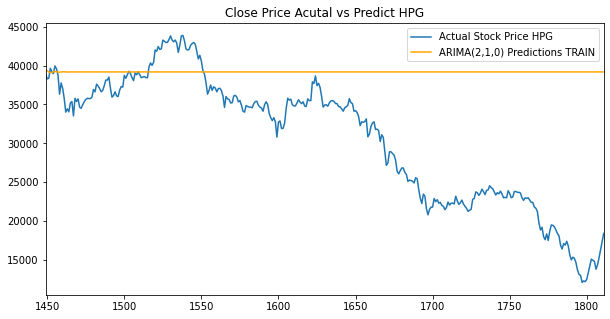

In [60]:
title = 'Close Price Acutal vs Predict HPG'
xlabel='' 
ax = test['price'].plot(figsize=(10,5),title=title,legend=True ,label='Actual Stock Price HPG')
# predictions.plot(legend=True)
pred_2['price'].plot(legend=True,color = 'orange',label='ARIMA(2,1,0) Predictions TRAIN')
ax.autoscale(axis='x',tight=True)

In [61]:
# #Train data
##lỗi trung bình bình phương RMSE(lỗi dự đoán) của tập test
#train model bằng tập train set
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

mae = mean_absolute_error(test['price'], pred_2['price'])
mape = mean_absolute_percentage_error(test['price'], pred_2['price'])
mse = mean_squared_error(test['price'], pred_2['price'])
rmse = np.sqrt(mse)
r2 = r2_score(test['price'], pred_2['price'])


print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 9114.88
MAPE: 41.76%
MSE: 140270681.77
RMSE: 11843.59
R2: -1.06
